In [1]:
import warnings
warnings.filterwarnings('ignore')


 **Market Basket Analysis for Retail Store Optimization**

Data Loading and Preprocessing

In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MessageError: Error: credential propagation was unsuccessful

In [ ]:
df = pd.read_excel('/content/retail_data.xlsx')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,CREAM CUPID HEARTS COAT HANGER,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
522063,581587,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,Date,Price,CustomerID
count,522064.000000,522064,522064.000000,388023.000000
mean,10.090435,2011-07-04 12:51:20.777107456,3.826801,15316.931710
min,-9600.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:15:00,1.250000,13950.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15265.000000
75%,10.000000,2011-10-19 14:12:00,4.130000,16837.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,161.110525,NaN,41.900599,1721.846964


Checking for missing values

In [ ]:
print(df.CustomerID.nunique())

4297


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.CustomerID.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
CustomerID,
17841.0,7847
14096.0,5111
12748.0,4596
14606.0,2700
15311.0,2379
...,...
12346.0,1
18268.0,1
17846.0,1


In [ ]:
df.describe(include=['object'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Country
count,522064,520609,522064
unique,21663,4185,30
top,573585,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2269,487622


In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
BillNo,0
Itemname,1455
Quantity,0
Date,0
Price,0
CustomerID,134041
Country,0


Handling Missing Data: Missing values in the Itemname and CustomerID columns are dropped using df.dropna().

In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(522064, 7)

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(388023, 7)

In [ ]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
BillNo,0
Itemname,0
Quantity,0
Date,0
Price,0
CustomerID,0
Country,0


In [ ]:
# df.dropna(subset=['Itemname'], inplace=True)

Rechecking to ensure that there are no missing values any.

Duplicate rows present


In [ ]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 5212


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


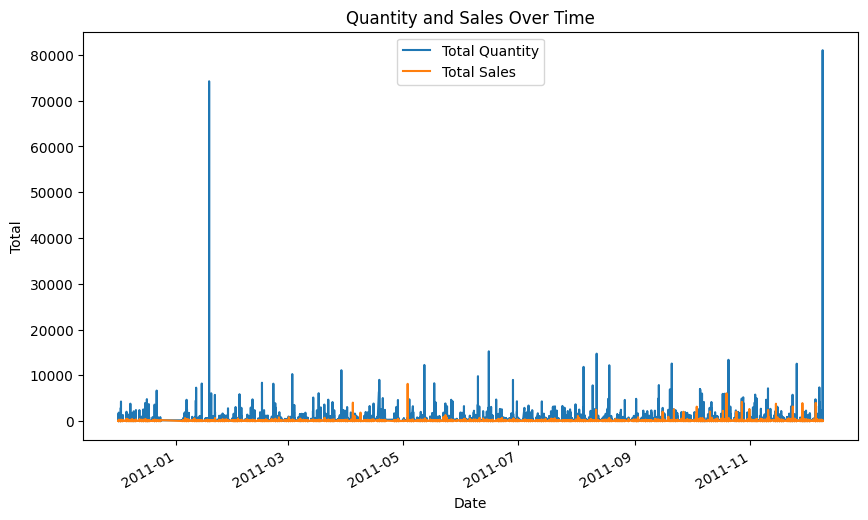

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
df.groupby('Date')['Quantity'].sum().plot(label='Total Quantity', legend=True)
df.groupby('Date')['Price'].sum().plot(label='Total Sales', legend=True)
plt.title('Quantity and Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total')
plt.show()


There are peak fluctuations in both quantity and total sales over time, with a notable spike around December, suggesting an increase in sales during the holiday season.

Bar plot


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-43-ba3752053edb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_sales, x='Quantity', y='Itemname', palette='viridis')


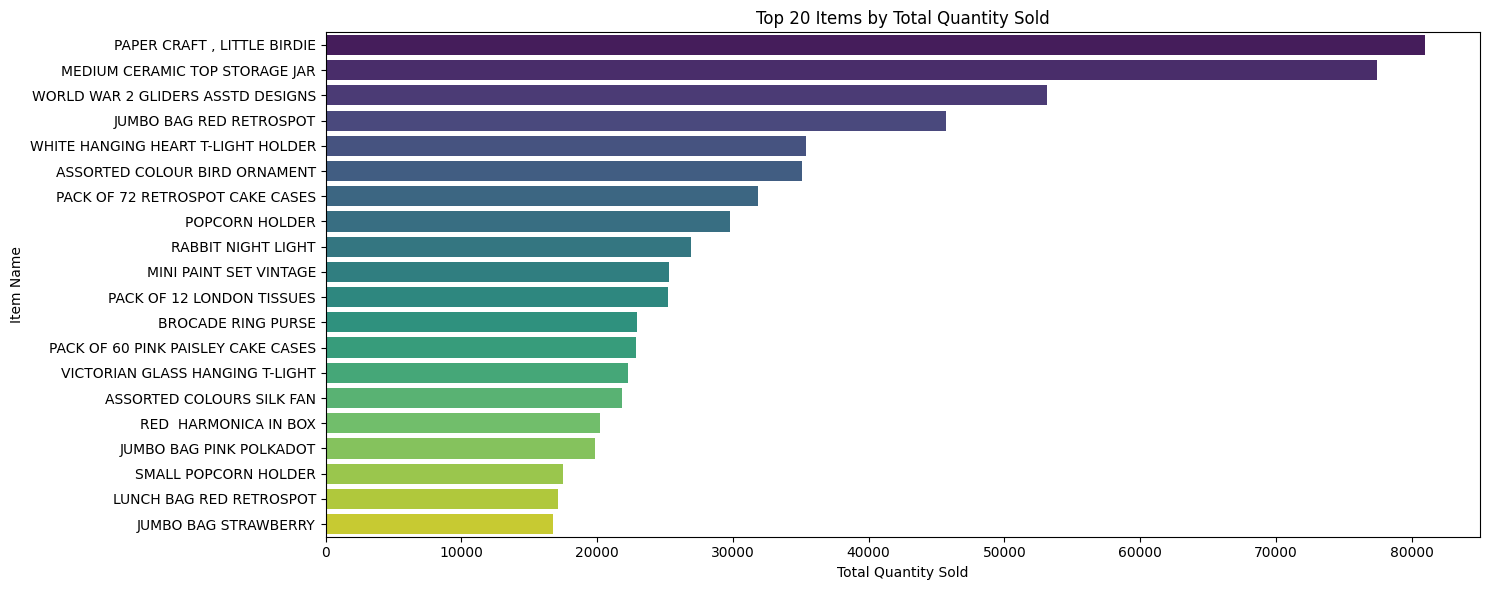

In [ ]:
# Total quantity sold per item
item_sales = df.groupby('Itemname')['Quantity'].sum().reset_index()

item_sales = item_sales.sort_values(by='Quantity', ascending=False).head(20)

plt.figure(figsize=(15, 6))
sns.barplot(data=item_sales, x='Quantity', y='Itemname', palette='viridis')
plt.title('Top 20 Items by Total Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()


Items like "WORLD WAR 2 GLIDERS ASSTD DESIGNS" and "CREAM HEARTS COAT HANGER" dominate the top-selling list, indicating their popularity and potential for promotion or prime placement in the store.

---



In [ ]:
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=revenue_by_country.values, y=revenue_by_country.index, palette='plasma')
plt.title('Total Revenue by Country')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 'Column not found: Revenue'

The United Kingdom contributes the most to total revenue.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-45-26657a7aad14>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_prices, x='Itemname', y='Price', palette='viridis')


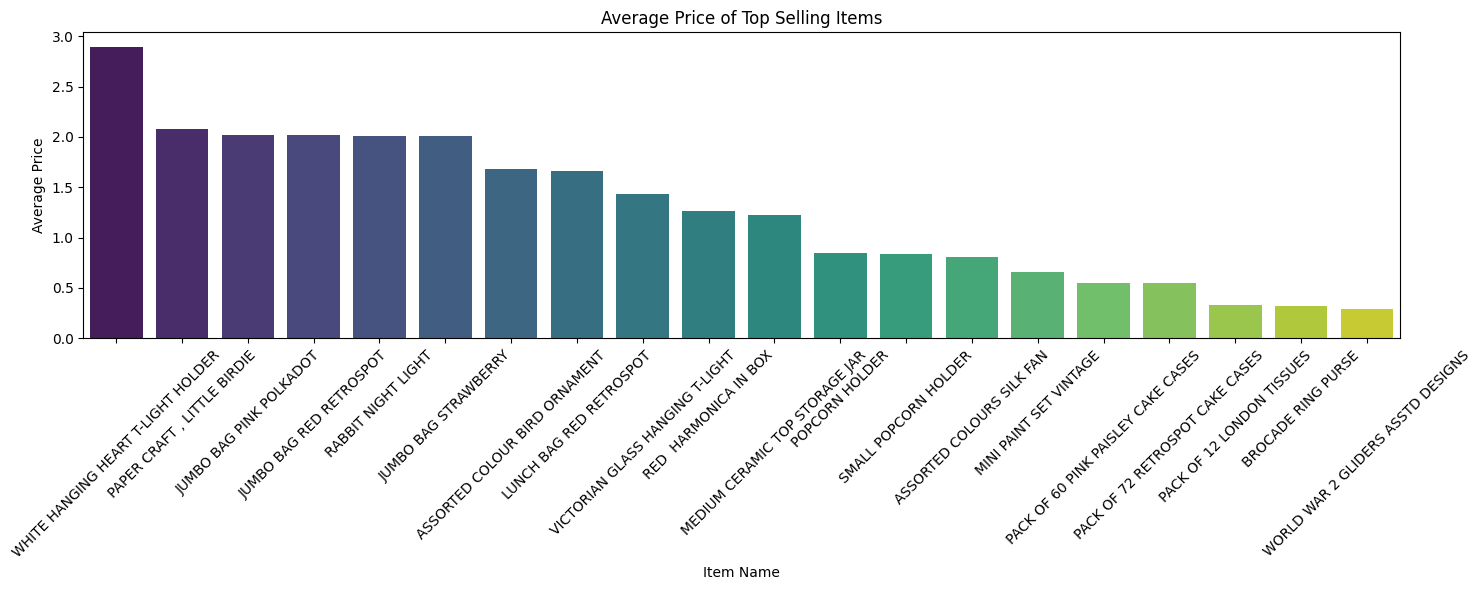

In [ ]:
# Get top selling items
top_items = item_sales['Itemname'].tolist()

# Filter the original DataFrame for top items
top_item_prices = df[df['Itemname'].isin(top_items)]

# Calculate the average price for each item
average_prices = top_item_prices.groupby('Itemname')['Price'].mean().reset_index()

# Sort the values for better visualization
average_prices.sort_values(by='Price', ascending=False, inplace=True)

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(data=average_prices, x='Itemname', y='Price', palette='viridis')

plt.title('Average Price of Top Selling Items')
plt.xlabel('Item Name')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Some top-selling items have low average prices like "WORLD WAR 2 GLIDERS"

The data is grouped by 'BillNo' and 'Itemname', creating a transaction dataset suitable for association rule mining.

In [ ]:
transactions = df.groupby('BillNo')['Itemname'].apply(list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Itemname
BillNo,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, CREAM CUP..."
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA..."
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO..."
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
536369,[BATH BUILDING BLOCK WORD]
...,...
581583,"[LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA..."
581584,"[RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE..."
581585,"[BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT..."


Transactional Encoding

In [ ]:
te = TransactionEncoder()

te_ary = te.fit(transactions).transform(transactions)

transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Apriori** **algorithm**

In [ ]:
frequent_itemsets = apriori(transaction_df, min_support=0.04, use_colnames=True)

# Display the frequent itemsets
display(frequent_itemsets)
print(frequent_itemsets.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.043000,(ALARM CLOCK BAKELIKE GREEN)
1,0.047074,(ALARM CLOCK BAKELIKE RED)
2,0.074767,(ASSORTED COLOUR BIRD ORNAMENT)
3,0.045367,(BAKING SET 9 PIECE RETROSPOT)
4,0.041238,(GARDENERS KNEELING PAD KEEP CALM)
5,0.043715,(HEART OF WICKER LARGE)
6,0.051919,(HEART OF WICKER SMALL)
7,0.045642,(JAM MAKING SET PRINTED)
8,0.046193,(JAM MAKING SET WITH JARS)
9,0.040302,(JUMBO BAG ALPHABET)


 support                              itemsets
0.043000          (ALARM CLOCK BAKELIKE GREEN)
0.047074            (ALARM CLOCK BAKELIKE RED)
0.074767       (ASSORTED COLOUR BIRD ORNAMENT)
0.045367        (BAKING SET 9 PIECE RETROSPOT)
0.041238    (GARDENERS KNEELING PAD KEEP CALM)
0.043715               (HEART OF WICKER LARGE)
0.051919               (HEART OF WICKER SMALL)
0.045642              (JAM MAKING SET PRINTED)
0.046193            (JAM MAKING SET WITH JARS)
0.040302                  (JUMBO BAG ALPHABET)
0.047569             (JUMBO BAG PINK POLKADOT)
0.086605             (JUMBO BAG RED RETROSPOT)
0.041348              (JUMBO BAG VINTAGE LEAF)
0.043055   (JUMBO SHOPPER VINTAGE RED PAISLEY)
0.042284              (JUMBO STORAGE BAG SUKI)
0.057204             (LUNCH BAG  BLACK SKULL.)
0.046909              (LUNCH BAG APPLE DESIGN)
0.052194                 (LUNCH BAG CARS BLUE)
0.050322             (LUNCH BAG PINK POLKADOT)
0.069702             (LUNCH BAG RED RETROSPOT)
0.053846     

List of common products purchased together



---




In [ ]:
# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rounding and ratio calculations for association rules data frame.

In [ ]:
rules['support'] = rules['support'].round(2)
rules['confidence'] = rules['confidence'].round(2)
rules['lift'] = rules['lift'].round(2)

rules['ratio'] = (rules['confidence'] / rules['support']).round(2)

display(rules)
print(rules.to_string(index=False))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,ratio


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric, ratio]
Index: []


Filtering rules based on confidence and lift thresholds

In [ ]:
rules_filtered = rules[(rules['confidence'] >= 0.6) & (rules['lift'] >= 1.2)]

if 'ratio' in rules_filtered.columns:
    filtered_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift', 'ratio']
else:
    filtered_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']

display(rules_filtered[filtered_columns])
print(rules_filtered[filtered_columns].to_string(index=False))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,ratio


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift, ratio]
Index: []


Handling Redundant rules

In [ ]:
def filter_redundant_rules(rules_df):
    seen_rules = set()
    non_redundant_rules = []

    for _, row in rules_df.iterrows():
        antecedents = frozenset(row['antecedents'])
        consequents = frozenset(row['consequents'])

        rule_pair = (antecedents, consequents)

        if rule_pair not in seen_rules:
            seen_rules.add(rule_pair)
            non_redundant_rules.append(row)

    return pd.DataFrame(non_redundant_rules)

# Assuming rules_filtered is already defined
rules_no_redundancy = filter_redundant_rules(rules_filtered)

# Display the filtered rules
display(rules_no_redundancy)
print(rules_no_redundancy.to_string(index=False))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,ratio
8,(HAND WARMER OWL DESIGN),(HAND WARMER SCOTTY DOG DESIGN),0.087622,0.093185,0.06,0.63,6.81,0.047468,2.483885,0.935175,10.5
9,(HAND WARMER SCOTTY DOG DESIGN),(HAND WARMER OWL DESIGN),0.093185,0.087622,0.06,0.60,6.81,0.047468,2.264050,0.940913,10.0
14,(KNITTED UNION FLAG HOT WATER BOTTLE),(RED WOOLLY HOTTIE WHITE HEART.),0.066759,0.097357,0.05,0.69,7.06,0.039398,2.888456,0.919794,13.8


                          antecedents                      consequents  antecedent support  consequent support  support  confidence  lift  leverage  conviction  zhangs_metric  ratio
             (HAND WARMER OWL DESIGN)  (HAND WARMER SCOTTY DOG DESIGN)            0.087622            0.093185     0.06        0.63  6.81  0.047468    2.483885       0.935175   10.5
      (HAND WARMER SCOTTY DOG DESIGN)         (HAND WARMER OWL DESIGN)            0.093185            0.087622     0.06        0.60  6.81  0.047468    2.264050       0.940913   10.0
(KNITTED UNION FLAG HOT WATER BOTTLE) (RED WOOLLY HOTTIE WHITE HEART.)            0.066759            0.097357     0.05        0.69  7.06  0.039398    2.888456       0.919794   13.8


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


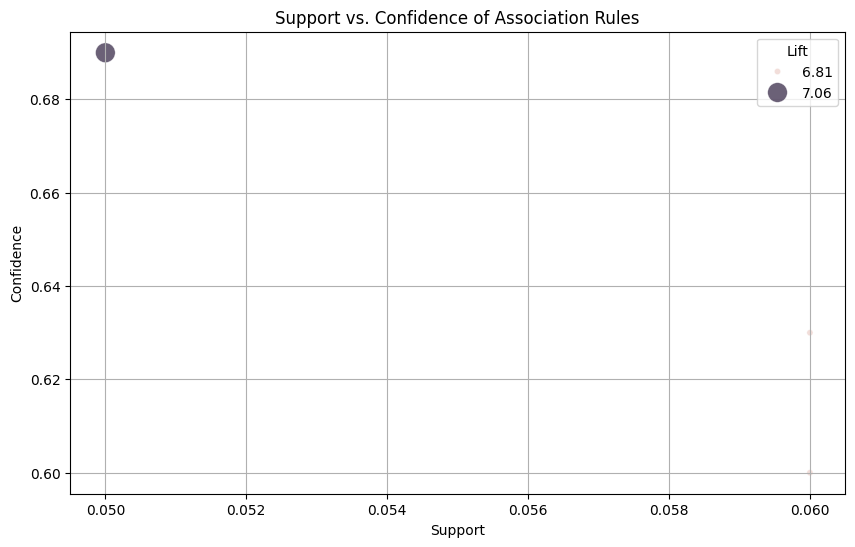

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules_no_redundancy, x='support', y='confidence', hue='lift', size='lift', sizes=(20, 200), alpha=0.7)
plt.title('Support vs. Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


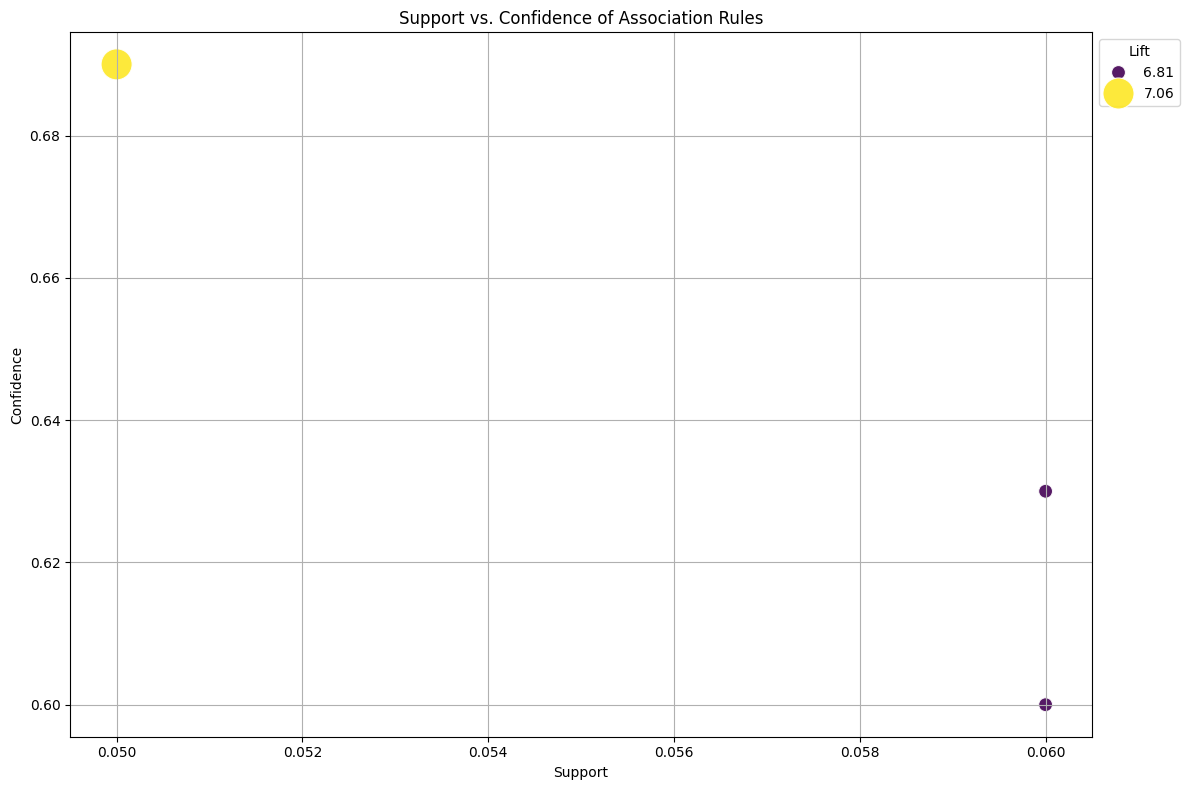

In [ ]:
plt.figure(figsize=(12, 8))

# Create a scatter plot with a distinct color palette
sns.scatterplot(data=rules_no_redundancy,
                x='support',
                y='confidence',
                hue='lift',
                size='lift',
                sizes=(100, 500),  # Size range for points
                palette='viridis',  # Change color palette for better visibility
                alpha=0.9)  # Less transparency

plt.title('Support vs. Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend position
plt.grid(True)

plt.tight_layout()  # Adjust layout
plt.show()




*   Low Support, High Confidence :Rule (Yellow point) has a high confidence (~ 0.68) but relatively low support ( ~ 0.05).  This indicates that although the combination of these products is not very frequent, when they are bought together, it happens consistently. The high lift (~7.06) further indicates a strong relationship between the items.

*   Higher Support, Moderate Confidence: The rule with higher support  
(~ 0.06) and moderate confidence (~ 0.60) represents a more frequently occurring product association but with slightly weaker reliability compared to the previous rule. The lift (~6.81) is still significant, indicating that these products are often bought together more than expected by chance.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


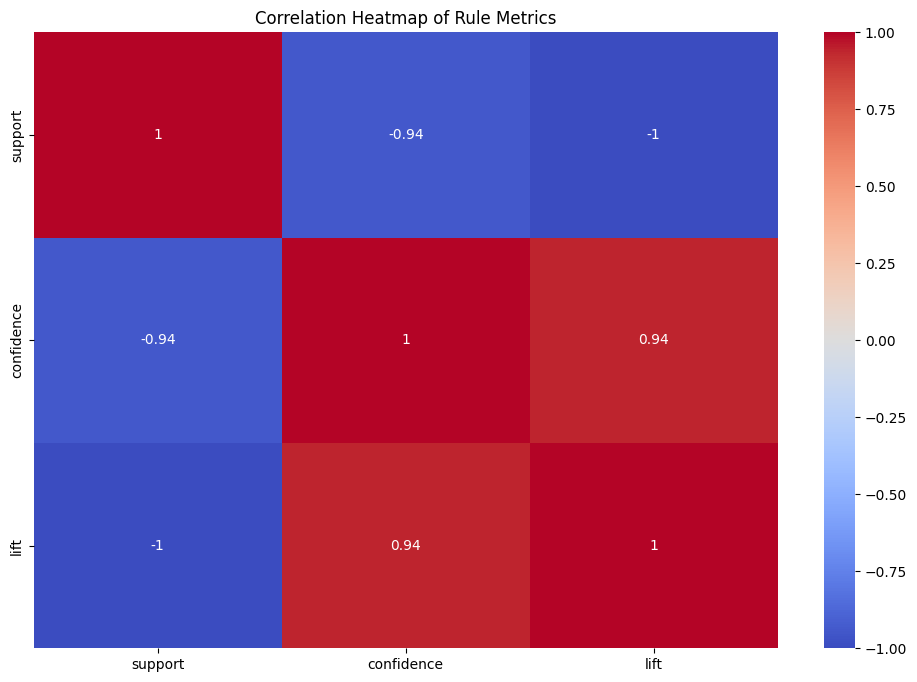

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(rules_no_redundancy[['support', 'confidence', 'lift']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Rule Metrics')
plt.show()
